## <font color = "DarkGreen"> Capston Project for SCTP Associate Artificial Intelligence Developer

**Learner: Ganesh Borse** 


## <font color = "blue"> 1. Introduction and Project Overview

Artificial Intelligence is achieved by applying Machine learning and Deep learning models to classification, identification, prediction and generation of text, vision, speech.
 Human vision processing is highly evovled. Comparatively, AI based computer vision is in progressing stages. Basic building blocks of computer vision system involves classification (object recognition), object detection, instance segementation, object location and so on.
 <>


**Problem statement:** Correct image classification (or object recognition) is vital as it leads to next steps in computer vision.
This could either be achieved by tabulating distinguishing attributes of objects to classify, like length and width attributes of Iris flower species in Iris dataset. Or, by extracting and identifying the edges and features from the binary pixel data of the digital images.

 Former uses the unsupervised (classification) machine learning models, like Logisitcs Regression, KNN, SVM, Decision Tree Classifier and Random Forest.

 Latter is performed using deep learning neural networks, specifically Convolutional Neural Networks and/or variants.

**Project Purpose:**
Learn and develop a CNN based image classification system using Tensorflow and Keras frameworks. Additionally, familarize with the existing image classification research and models, and the next steps in the computer vision.

## <font color = "blue">2. Literature Review

### a. Image Classification Models:

  As a legend, computer vision started with the **MIT Professor Marvin Minsky**'s 1960 summar project assignment to undergraduates, that required them to attach a camera to a computer and have the computer describe everything that it sees. Then, the researchers were creating algorithms to detect shapes, lines, and edges in photographs.
Decades after that computer vision evolved into several subfields like signal processing, image processing, computer photometry, object recognition, and so on. Object recognition is one of the most important and challenging area in computer vision. The breakthrough in this area led to the rise of AI known today.

**Yann LeCun(1998)** was the first to develop CNN based **handwritten digits recognition(LeNet)**, and so prove the effectiveness of CNNs in image recognition.

Attribute based classification is widely used with unsupervised (classification) machine learning models. Amazon Mechanical Turks enhanced the Caltech-UCSD birds database(CUB-200-2011) by labeling the attributes, such as color, size, visual features for each photo. This makes it easy to use these attributes for birds image classification using Random Forest or similar classifiction models. Other examples are Iris flowers, Rice datasets.

**Alex Krizhevsky et al**.'s CNN variant architecture **AlexNet** for object recognition won ILSVRC-2012 (ImageNet Large Scale Visual Recognition Challenge). Highly sophisticated than LeNET, AlexNet provided significant breakthrough for object recognition.

**Google's Inception**, winner of ILSVRC-2014 predicts efficiently (*improved training time*) with high accuracy and far fewer training parameters, compared to its closest contender VGG16. 

Oxford's **Visual Geometry Group's VGG16** further improved CNNs and finished second in the ILSVRC-2014.

**Kaiming He et al.'s ResNet** (residual neural network), introduced at the ILSVRC-2015, has the residual block technique which allowed the neural network to be deeper with moderate number of parameters.

### b. Notable datasets and notebooks:
A number of image datasets are widely used in the industry. Few of them are MNIST(fashion, handwritten digits), CIFAR10, Flowers, Rice, Iris, Caltech-UCSD database(CUB-200-2011), Cats and Dogs by Microsoft. These datasets are of different types: image attributes, segmented images, grayscale images, RGB images, and so on.

**Rice classification:** https://www.kaggle.com/code/musab2077/rice-image-classification-by-tensorflow

**MNIST Fashion - clothing image classification:** https://www.tensorflow.org/tutorials/keras/classification

**Kaggle Dataset:** https://www.kaggle.com/datasets/gpiosenka/100-bird-species

**Comparison of Classification models:** https://github.com/projgb/ML_ClassificationModels

### c. Project Rationale:
With this overview, we can understand that models and datasets are somewhat related.

 *Thus, the project rationale is to design and develop a CNN-based model for RGB digital images, the main focus being the process compared to the end goal.*


## <font color = "blue">3. Design and Implementation of CNN-based Image classification model

**Data loading, preprocessing and splitting:**
* For this project, 3 classes, 60 images per class from CUB-200-2011 database are used.
* As image sizes vary greatly, all images are resized to CNN's standard image size of 256x256 and normalized by 1/255.
* Training and Validation sets are splited in the ratio of 90%-10%.

**CNN model design:**
CNN model is formed with Conv2D, MaxPooling2D, Flatten and Dense layers. More layers are added for further enhancements.

* **References:** 
  - Image Classification Tutorial : https://www.tensorflow.org/tutorials/images/classification
  - Image Classification Notebook : https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb
  - **Image Dataset : http://www.vision.caltech.edu/visipedia/CUB-200-2011.html**

**Import necessary libraries:**

In [16]:
#Import necessary libraries
import math
from glob import glob
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory as image_dataset_from_directory
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import seaborn as sns
#-----------------------------------
# fn: print float number with 2 floating point numbers
def floatwith2digits(fltnum):
    fltw2digs='{:.2f}'.format(fltnum)
    return fltw2digs

**Data loading and splitting:** A parametrized function loads image dataset and splits conveniently into training and validation data sets using keras image_dataset_from_directory function. The convenience function helps modify the parameters quickly.

In [18]:
# fn: load and split data from data directory
def datasplitter(imgsdir,valsplit=0.05,ipbatchsz=0.1,imghw=200,clrs=3,SEED=123):
    data_path = pathlib.Path(imgsdir).with_suffix('')
    toret = {}
    print("datasplitter:Inputs:{}, Split:{}, Btchsz:{}, SEED:{}, Imghw:{}".format(imgsdir,valsplit,\
                                            ipbatchsz,SEED,imghw))
    toret["trainds"] = image_dataset_from_directory(data_path,validation_split=valsplit,subset="training"
                                        ,color_mode="rgb",seed=SEED,image_size=(imghw, imghw)
                                        ,batch_size=ipbatchsz,shuffle=True)
    toret["valds"] = image_dataset_from_directory(data_path,validation_split=valsplit,subset="validation"
                                        ,color_mode="rgb",seed=SEED,image_size=(imghw, imghw)
                                        ,batch_size=ipbatchsz,shuffle=True)
    return toret

**Model implementations:**

 Model is developed in 3 variants:
 * Base: minimal basic layers. Two models- Tune1 and Tune2 are developed to eliminate overfitting, improve accuracy, and reduce loss.
 * Tune1: adding one DropOut layer and early stopping callback,
 * Tune2: additional DropOut layers per block, training image augmentations, and reducing validation split.

In [20]:
# 1st model: base cnn model with basic features
def buildbasecnn(trainds,valds,valsplit,nepochs=50,imghw=200,clrs=3):
    model = Sequential([layers.Rescaling(1./255,input_shape=(imghw,imghw,clrs)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(len(trainds.class_names), name="outputs")])
    model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    print("basecnn: compile done")
    print("basecnn: Training started.")
    hist = model.fit(trainds,validation_data=valds,validation_split=valsplit
                     ,epochs=nepochs,verbose=True)
    print("basecnn: Training done.")
    return model, hist, nepochs
##----------------------
print("basecnn defined!")

basecnn defined!


In [22]:
# Earlystopper class for stopping the training when desired validation accuracy or loss are reached.
class earlyStopper(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.earlystopat = 0
    def on_epoch_end(self, epoch, logs={}):
        if epoch <= 10:
            return
        acc = logs.get('accuracy')
        vacc = logs.get('val_accuracy')
        loss = logs.get('loss')
        vloss = logs.get('val_loss')
        if vloss < 0.1 or vacc > 0.9:
            print("\nEarlyStop:valacc:{},vloss:{},acc:{},loss:{} epoch:{}".format(floatwith2digits(vacc)\
                                            ,floatwith2digits(vloss),floatwith2digits(acc),floatwith2digits(loss),epoch))
            self.earlystopat = epoch
            self.model.stop_training = True
    def getstopped_epoch(self):
        print("getstopepoch:earlystopat:{}".format(self.earlystopat))
        return self.earlystopat

In [24]:
# 2nd model: tuned cnn model with early stopping & 1 dropout layer
def buildtunedcnn1(trainds,valds,valsplit,nepochs=50,imghw=200,clrs=3):
    model = Sequential()
    model.add(layers.Rescaling(1./255,input_shape=(imghw,imghw,clrs)))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(trainds.class_names), name="outputs"))
    model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    print("tunedcnn1: compile done")
    callbacks = [earlyStopper()]
    print("tunedcnn1: Training started.")
    hist = model.fit(trainds,validation_data=valds,validation_split=valsplit
                         ,epochs=nepochs,verbose=True,callbacks=callbacks)
    print("tunedcnn1: Training done.")
    acc = hist.history['accuracy']
    stopat = callbacks[0].getstopped_epoch()
    if stopat != len(acc):
        stopat = len(acc)
    epochs_range = range(nepochs) if stopat >= nepochs else range(stopat)
    print("tunedcnn1:epochs_range:{},acc.len:{},epochs:{},stopat:{}".format(epochs_range\
                                                                    ,len(acc),nepochs,stopat))
    return model,hist,stopat
print("buildtunedcnn1 defined!")

buildtunedcnn1 defined!


In [3]:
# 3rd model: tuned cnn model with early stopping, dropouts, training image augmentations
def buildtunedcnn2(trainds,valds,valsplit,nepochs=50,imghw=200,clrs=3):
    model = Sequential()
    model.add(layers.Rescaling(1./255))
    model.add(layers.RandomFlip("horizontal"))
    model.add(layers.RandomZoom(0.1))
    model.add(layers.RandomTranslation(height_factor=-0.2,width_factor=-0.2))
    model.add(layers.RandomRotation(-0.1))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(trainds.class_names), name="outputs"))
    model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True\
                            ,reduction="sum_over_batch_size"),metrics=['accuracy'])
    print("tunedcnn2: compile done")
    callbacks = [earlyStopper()]
    print("tunedcnn2: Training started.")
    hist = model.fit(trainds,validation_data=valds,validation_split=valsplit
                     ,epochs=nepochs,verbose=True,shuffle=True)
    print("tunedcnn2: Training done.")
    acc = hist.history['accuracy']
    stopat = callbacks[0].getstopped_epoch()
    if stopat != len(acc):
        stopat = len(acc)
    epochs_range = range(nepochs) if stopat >= nepochs else range(stopat)
    print("tunedcnn2:epochs_range:{},acc.len:{},epochs:{},stopat:{}".format(epochs_range\
                                                                    ,len(acc),nepochs,stopat))
    return model,hist,stopat
print("buildtunedcnn2 defined!")

buildtunedcnn2 defined!


## <font color = "blue">4. Model evaluation Strategy:

 Models are evaluated using validation accuracy, validation loss, precision-accuracy-recall from the confusion matrix and classificaton report.

### Validation accuracy and Validation loss:
 Validation accuracy and validation loss are monitored during training.

### Confusion matrix and classification report:
 Since, this is unsupervised (classification) model, Precision, Recall, and Accuracy values from the confusion matrix and classificaton report are used to properly assess the performance of the model.
 Functions **plotaccloss** and **createcm_classrpt** are prepared to get consistent results across all the testing and all the time.


In [26]:
# fn: plot accuracy,loss values:
def plotaccloss(hist,modelnm):
    acc = hist.history['accuracy']
    vacc = hist.history['val_accuracy']
    loss = hist.history['loss']
    vloss = hist.history['val_loss']
    numepcs = len(vloss)
    epcrng = range(numepcs)
    plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epcrng, acc, label='Training Accuracy')
    plt.plot(epcrng, vacc, label='Validation Accuracy')
    plt.legend(loc='lower right', title_fontsize=3)
    plt.title('Accuracy ( {} )'.format(modelnm), size=7)
    plt.subplot(1, 2, 2)
    plt.plot(epcrng, loss, label='Training Loss')
    plt.plot(epcrng, vloss, label='Validation Loss')
    plt.legend(loc='upper right', title_fontsize=3)
    plt.title('Loss ( {} )'.format(modelnm), size=7)
    plt.tight_layout()
    plt.show()
#----
# fn: create confusion-matrix & classification-report:
def createcm_classrpt(actlabels,predlabels,numclasses):
    print("Classification Report:")
    print("{}".format(metrics.classification_report(actlabels,predlabels,zero_division=0.0)))
    cm = np.zeros((numclasses, numclasses))
    cm = tf.math.confusion_matrix(actlabels,predlabels)
    print("Confusion matrix:")
    print("{}".format(cm))
    plt.subplots(figsize=(1, 1))
    sns.heatmap(cm,annot=True,cmap='viridis')
print("Common fns defined!")

Common fns defined!


## <font color = "blue">4-A. Models Testing:

 Let's test the models to evaluate the performance based on performance metrics discussed earlier. 

Test steps are to setup necessary hyperparameters, load the data, train the model, and visualize the performance measures.

In [44]:
# Setup image dataset directory:
dataimgsdir = 'Data\\birds'

## <font color = "blue">4-A-1. Base Model:

  Test the Base model using following parameters.

In [68]:
# 1A. Setup hyperparameters for basecnn model
modelnm = "basecnn"
imghw,nepochs,ipbatchsz,SEED,valsplit = 256, 50, 32, 123, 0.1

**Load the data**

In [70]:
# 2. Load & split data for sending to the Base model:
ds = datasplitter(dataimgsdir,valsplit,ipbatchsz=ipbatchsz,imghw=imghw,SEED=SEED)
trainds, valds = ds["trainds"], ds["valds"]
classes = trainds.class_names
numclasses = len(classes)

datasplitter:Inputs:Data\birds, Split:0.1, Btchsz:32, SEED:123, Imghw:256
Found 180 files belonging to 3 classes.
Using 162 files for training.
Found 180 files belonging to 3 classes.
Using 18 files for validation.


**Create and train the Base model for evaluation:**

In [11]:
# 3. Build and train selected model:
print("Build_fit:{} model".format(modelnm))
model, hist, nepochsran = buildbasecnn(trainds,valds,valsplit=valsplit,nepochs=nepochs,imghw=imghw)

Build_fit:basecnn model
basecnn: compile done
basecnn: Training started.
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - accuracy: 0.3158 - loss: 2.5829 - val_accuracy: 0.2222 - val_loss: 1.5266
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.3721 - loss: 1.1443 - val_accuracy: 0.3333 - val_loss: 1.1079
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.5607 - loss: 1.0468 - val_accuracy: 0.2778 - val_loss: 1.1093
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.4469 - loss: 0.9635 - val_accuracy: 0.6111 - val_loss: 1.0559
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.7437 - loss: 0.8183 - val_accuracy: 0.6111 - val_loss: 1.0201
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.8628 - loss: 0.5861 - val_accuracy: 0.6111 - val_loss: 0.7575
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.8365 - loss: 0.4208 - val_accuracy: 0.6111 - val_loss: 0.9157
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/

**Plot Accuracy, Loss, Confusion Matrix, Classification Report from the Base model's training and predictions:**

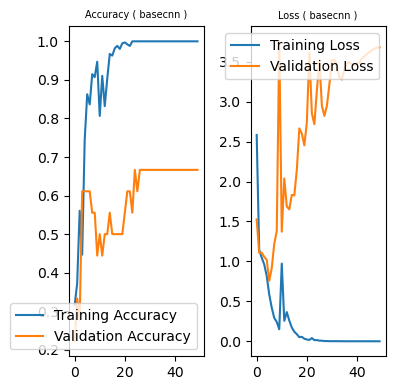

In [96]:
# 4. View loss and accuracy after model training
plotaccloss(hist,modelnm)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.67      0.73         6
           2       0.57      0.67      0.62         6

    accuracy                           0.67        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.68      0.67      0.67        18

Confusion matrix:
[[4 0 2]
 [1 4 1]
 [1 1 4]]


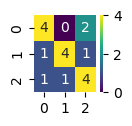

In [98]:
# 5. Analyse performance with confusion matrix and classification report:
valds_pred = model.predict(valds,verbose=False)
valdslabels,predids1by1 = [],[]
for images, labels in valds:
    valdslabels = labels
    for i in range(len(labels)):
        predids1by1.append(np.argmax(tf.nn.softmax(valds_pred[i])))
createcm_classrpt(valdslabels,predids1by1,numclasses)

## <font color = "blue">4-A-2. Tune1 Model:

  As Base model is affected by overfitting, let's try to add early stopping and a DropOut layer to mitigate ovefitting. Model is defined in buildtunedcnn1 function.

In [72]:
# 1B. Setup hyperparameters for tuned-cnn-1 model
modelnm = "tunedcnn1"
imghw,nepochs,ipbatchsz,SEED,valsplit = 256, 75, 32, 123, 0.1

**Load the data**

In [74]:
# 2. Load & split data for sending to the Tune1 model:
ds = datasplitter(dataimgsdir,valsplit,ipbatchsz=ipbatchsz,imghw=imghw,SEED=SEED)
trainds, valds = ds["trainds"], ds["valds"]
classes = trainds.class_names
numclasses = len(classes)

datasplitter:Inputs:Data\birds, Split:0.1, Btchsz:32, SEED:123, Imghw:256
Found 180 files belonging to 3 classes.
Using 162 files for training.
Found 180 files belonging to 3 classes.
Using 18 files for validation.


**Create and train the Tune1 model for evaluation:**

In [11]:
# 3. Build and train selected model:
print("Build_fit:{} model".format(modelnm))
model, hist, nepochsran = buildtunedcnn1(trainds,valds,valsplit=valsplit,nepochs=nepochs,imghw=imghw)

Build_fit:tunedcnn1 model
tunedcnn1: compile done
tunedcnn1: Training started.
Epoch 1/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.2807 - loss: 1.7796 - val_accuracy: 0.5000 - val_loss: 1.0419
Epoch 2/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.4205 - loss: 1.0656 - val_accuracy: 0.2778 - val_loss: 1.1311
Epoch 3/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.3586 - loss: 1.1122 - val_accuracy: 0.2778 - val_loss: 1.0988
Epoch 4/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.6165 - loss: 0.9516 - val_accuracy: 0.6667 - val_loss: 0.9893
Epoch 5/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.7478 - loss: 0.7578 - val_accuracy: 0.4444 - val_loss: 0.8942
Epoch 6/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.8299 - loss: 0.4853 - val_accuracy: 0.7222 - val_loss: 0.7378
Epoch 7/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.8423 - loss: 0.4643 - val_accuracy: 0.6667 - val_loss: 0.7749
Epoch 8/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 

**Plot Accuracy, Loss, Confusion Matrix, Classification Report from the Tune1 model's training and predictions:**

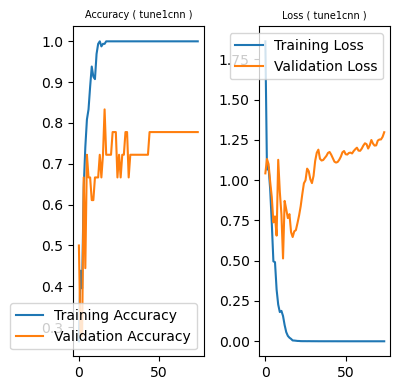

In [100]:
# 4. View loss and accuracy after model training
plotaccloss(hist,modelnm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.71      0.83      0.77         6
           2       0.67      0.67      0.67         6

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.78        18
weighted avg       0.79      0.78      0.78        18

Confusion matrix:
[[5 0 1]
 [0 5 1]
 [0 2 4]]


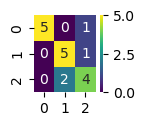

In [102]:
# 5. Analyse performance with confusion matrix and classification report:
valds_pred = model.predict(valds,verbose=False)
valdslabels,predids1by1 = [],[]
for images, labels in valds:
    valdslabels = labels
    for i in range(len(labels)):
        predids1by1.append(np.argmax(tf.nn.softmax(valds_pred[i])))
createcm_classrpt(valdslabels,predids1by1,numclasses)

## <font color = "blue">4-A-3. Tune2 Model:

  Though, improvements in Tune1 model has reduced overfitting to some extent, model still have room for improvements.
  
Let's tune the hyperparameters more.
* 0.1 validation split gives only 54 images for Training. Slightly reduce validation split to 0.05, 57 Training images.
* Add 4 image augmentations - Flip, Zoom, Translation(Shift) and Rotation, to further increase Training images.
* Increase the number of epochs to give more learning time for the model.
* Reduce image size (h x w) to 200x200 to reduce impact of any visual noise in the images.
* Add DropOuts per block also to reduce the overfitting.
* Retain the EarlyStopping.

Tune2 model is defined in buildtunedcnn2 function.

In [77]:
# 1C. Setup hyperparameters for tuned-cnn-2 model
modelnm = "tunedcnn2"
imghw,nepochs,ipbatchsz,SEED,valsplit = 200, 500, 256, 123, 0.05

**Load the data**

In [79]:
# 2. Load & split data for sending to the Tune2 model:
ds = datasplitter(dataimgsdir,valsplit,ipbatchsz=ipbatchsz,imghw=imghw,SEED=SEED)
trainds, valds = ds["trainds"], ds["valds"]
classes = trainds.class_names
numclasses = len(classes)

datasplitter:Inputs:Data\birds, Split:0.05, Btchsz:256, SEED:123, Imghw:200
Found 180 files belonging to 3 classes.
Using 171 files for training.
Found 180 files belonging to 3 classes.
Using 9 files for validation.


**Create and train the Tune2 model for evaluation:**

In [11]:
# 3. Build and train selected model:
print("Build_fit:{} model".format(modelnm))
model, hist, nepochsran = buildtunedcnn2(trainds,valds,valsplit=valsplit,nepochs=nepochs,imghw=imghw)

Build_fit:tunedcnn2 model
tunedcnn2: compile done
tunedcnn2: Training started.
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3041 - loss: 1.1285 - val_accuracy: 0.3333 - val_loss: 2.1565
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 5.6449 - val_accuracy: 0.3333 - val_loss: 2.9669
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3626 - loss: 7.3458 - val_accuracy: 0.3333 - val_loss: 3.2936
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 9.4710 - val_accuracy: 0.3333 - val_loss: 2.2627
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 6.0820 - val_accuracy: 0.3333 - val_loss: 1.6815
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3392 - loss: 3.9413 - val_accuracy: 0.3333 - val_loss: 1.3581
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 3.0431 - val_accuracy: 0.3333 - val_loss: 1.1599
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc

**Plot Accuracy, Loss, Confusion Matrix, Classification Report from the Tune2 model's training and predictions:**

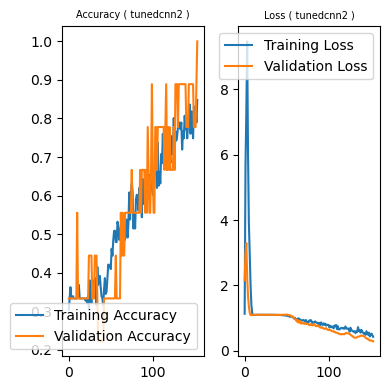

In [13]:
# 4. View loss and accuracy after model training
plotaccloss(hist,modelnm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9

Confusion matrix:
[[2 1 0]
 [0 3 0]
 [0 0 3]]


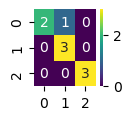

In [14]:
# 5. Analyse performance with confusion matrix and classification report:
valds_pred = model.predict(valds,verbose=False)
valdslabels,predids1by1 = [],[]
for images, labels in valds:
    valdslabels = labels
    for i in range(len(labels)):
        predids1by1.append(np.argmax(tf.nn.softmax(valds_pred[i])))
createcm_classrpt(valdslabels,predids1by1,numclasses)

## <font color = "blue">5. Ethical implications:
 Image dataset and model is from the publicly available sources and are not utilized for any personal and commercial gains.


## <font color = "blue">6. Findings and Recommendations:

Project provided deeper insights into the image classification models, datasets and techniques to implement a system using them.

**a. Findings:**
* Perform thorough study of dataset to understand the variations, outliers and issues in the dataset.
* Form a strategy to draw a sample group from bigger dataset and split the dataset into training and validation batches.
* Begin with, analyse and enahance a representative model configuration.
* Assess the results at each stage and tune the hyperparameters to eliminate the gaps and improve the performance.

**b. Recommendations:**
* Utilize the existing datasets to start with and augment this with image augmentations and our own additional data.
* Study and review various competitions and study notebooks available on Kaggle, Colab and elsewhere.
* Join Discord channels for various research.
* Try to utilize existing pretrained models available on kaggle for further fine tuning and improving the solutions.



## <font color = "DarkGreen"> Beyond and After SCTP:

  Interested to know more about my projects, please feel free to explore my Project's Github:
  https://github.com/projgb

## Thank You!